In [14]:
import time

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.rcParams['figure.figsize'] = (12, 12)
sns.set_style("whitegrid")

SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

from mr import utils
from mr.models.baseline import BaselineModel
from mr.models.knn import KNN
from mr.models.funk_svd import FunkSVD
from mr.models.neural_collaborative_filtering import NCF

In [3]:
train_filename = 'ml_small_tr.npy'
test_filename = 'ml_small_te.npy'
row_count = 610
col_count = 9724

data_train = np.load(train_filename)
data_test = np.load(test_filename)

X_train = data_train[:, :2].astype(int)
y_train = data_train[:, 2]
X_test = data_test[:, :2].astype(int)
y_test = data_test[:, 2]

In [6]:
k = 32

time_start = time.time()

mdl = KNN(row_count=row_count, col_count=col_count, K=k, prediction_mode='baseline_average')

mdl.fit(X_train, y_train)
y_predict = mdl.predict(X_test)

time_elapsed = time.time() - time_start
rmse = utils.compute_rmse(y_test, y_predict)
print('RMSE of KNN: {}'.format(rmse))
print('Elapsed time: {:.1f} seconds'.format(time_elapsed))

/home/seljuk/Desktop/eee585/project/eee-585-project/mr/models/knn.py:61: RuntimeWarning: invalid value encountered in true_divide
  col_deviation = self.X_train_csr.sum(axis=0).A1 / self.X_train_csr.getnnz(axis=0) - overall_mean


RMSE of KNN: 0.8853479240429086
Elapsed time: 723.1 seconds


In [4]:
# FUNKSVD

conf = {'factor_size': 16, 'iteration_count': 60, 'alpha': 0.003, 'beta': 0.1}

time_start = time.time()

mdl = FunkSVD(row_count=row_count, col_count=col_count, **conf)

mdl.fit(X_train, y_train)
y_predict = mdl.predict(X_test)

time_elapsed = time.time() - time_start
rmse = utils.compute_rmse(y_test, y_predict)
print('RMSE of FunkSVD: {}'.format(rmse))
print('Elapsed time: {:.1f} seconds'.format(time_elapsed))

RMSE of FunkSVD: 0.8937799493308483
Elapsed time: 86.6 seconds


In [5]:
# NCF

conf = {'factor_size': 16, 'iteration_count': 60, 'lr': 0.01, 'layers': (32, 16)}

time_start = time.time()

mdl = NCF(row_count=row_count, col_count=col_count, **conf)

mdl.fit(X_train, y_train)
y_predict = mdl.predict(X_test)

time_elapsed = time.time() - time_start
rmse = utils.compute_rmse(y_test, y_predict)
print('RMSE of NCF: {}'.format(rmse))
print('Elapsed time: {:.1f} seconds'.format(time_elapsed))

RMSE of NCF: 0.8840902793632891
Elapsed time: 244.2 seconds


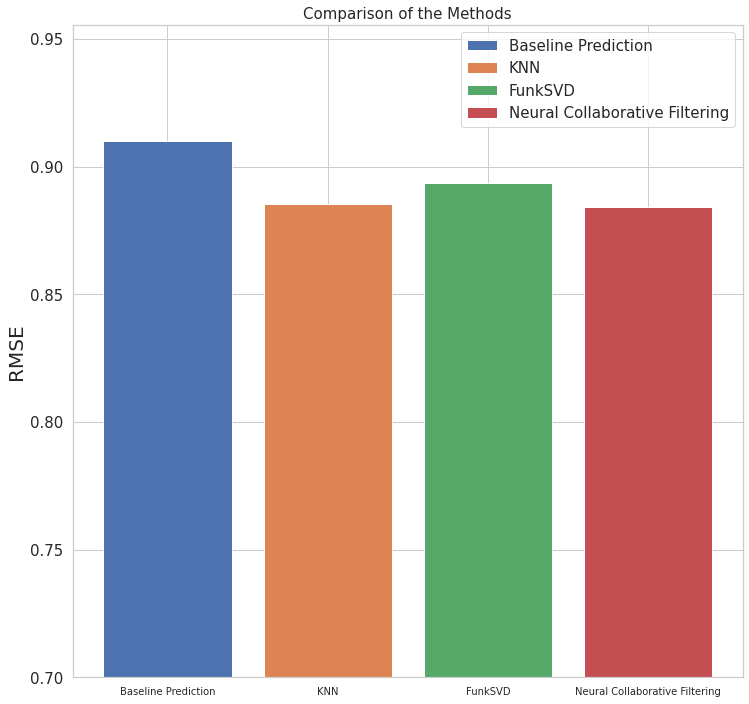

In [20]:
rmse_mean = 1.04
rmse_baseline = 0.91
rmse_knn = 0.8853479240429086
rmse_funksvd = 0.8937799493308483
rmse_ncf = 0.8840902793632891

#plt.bar(1, rmse_mean, label='Mean Prediction')
plt.bar(2, rmse_baseline, label='Baseline Prediction')
plt.bar(3, rmse_knn, label='KNN')
plt.bar(4, rmse_funksvd, label='FunkSVD')
plt.bar(5, rmse_ncf, label='Neural Collaborative Filtering')

plt.xticks([2, 3, 4, 5], ['Baseline Prediction', 'KNN', 'FunkSVD', 'Neural Collaborative Filtering'])

plt.ylim(ymin=0.7)
plt.ylabel('RMSE')
plt.title('Comparison of the Methods')

plt.legend()
plt.show()